In [48]:
import pandas as pd

# Đường dẫn file đã tải lên
file_path = "LtrUDchoKT_DuLieuBTNhomSo2_final.xlsx"

# Đọc danh sách sheet trong file
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Do uong', 'Banh keo', 'Thong tin san pham']

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Đọc dữ liệu từ file Excel
file_path = "LtrUDchoKT_DuLieuBTNhomSo2_final.xlsx"
sheets = ["Thong tin san pham", "Banh keo", "Do uong"]
df_thong_tin = pd.read_excel(file_path, sheet_name=sheets[0])
df_banh_keo = pd.read_excel(file_path, sheet_name=sheets[1])
df_do_uong = pd.read_excel(file_path, sheet_name=sheets[2])

# Kiểm tra danh sách cột
print("Các cột của df_thong_tin:", df_thong_tin.columns)
print("Các cột của df_banh_keo:", df_banh_keo.columns)
print("Các cột của df_do_uong:", df_do_uong.columns)

Các cột của df_thong_tin: Index(['Mã sản phẩm', 'Nhà cung cấp', 'Giá bán', 'Giá nhập',
       'Số lượng tồn kho', 'lợi nhuận dự kiến'],
      dtype='object')
Các cột của df_banh_keo: Index(['Mã sản phẩm', 'Tên sản phẩm', 'Đơn vị'], dtype='object')
Các cột của df_do_uong: Index(['Mã sản phẩm', 'Tên sản phẩm', 'Đơn vị'], dtype='object')


In [57]:
# Chuẩn hóa tên cột
df_thong_tin.columns = df_thong_tin.columns.str.strip()
df_banh_keo.columns = df_banh_keo.columns.str.strip()
df_do_uong.columns = df_do_uong.columns.str.strip()

# Lấy dữ liệu từ df_tong_hop nếu cần thiết
df_banh_keo = df_thong_tin[df_thong_tin["Mã sản phẩm"].isin(df_banh_keo["Mã sản phẩm"])]
df_do_uong = df_thong_tin[df_thong_tin["Mã sản phẩm"].isin(df_do_uong["Mã sản phẩm"])]

In [58]:
# Tạo DataFrame tổng hợp
df_tong_hop = df_thong_tin.copy()
df_tong_hop["Lợi nhuận dự kiến"] = df_tong_hop["Giá bán"] - df_tong_hop["Giá nhập"]
df_tong_hop["Tỷ lệ lợi nhuận"] = (df_tong_hop["Lợi nhuận dự kiến"] / df_tong_hop["Giá nhập"]) * 100
print("Dữ liệu df_tong_hop:")
print(df_tong_hop.head())

Dữ liệu df_tong_hop:
   Mã sản phẩm Nhà cung cấp  Giá bán  Giá nhập  Số lượng tồn kho  \
0            1      VIFOTEX    90000     69350                30   
1            2      VIFOTEX    93600     72485                45   
2            3      VIFOTEX    86400     65900                47   
3            4      VIFOTEX    78900     63200                59   
4            5     BachKhoa    85690     62300                43   

   lợi nhuận dự kiến  Lợi nhuận dự kiến  Tỷ lệ lợi nhuận  
0              20650              20650        29.776496  
1              21115              21115        29.130165  
2              20500              20500        31.107739  
3              15700              15700        24.841772  
4              23390              23390        37.544141  


In [59]:
# Thống kê
gia_nhap_cao_nhat = {
    "Bánh kẹo": df_banh_keo.loc[df_banh_keo["Giá nhập"].idxmax()],
    "Đồ uống": df_do_uong.loc[df_do_uong["Giá nhập"].idxmax()]
}
print("Sản phẩm có giá nhập cao nhất:", gia_nhap_cao_nhat)
print("")
tong_ton_kho = {
    "Bánh kẹo": df_banh_keo["Số lượng tồn kho"].sum(),
    "Đồ uống": df_do_uong["Số lượng tồn kho"].sum()
}
print("Tổng số lượng tồn kho:", tong_ton_kho)
print("")
gia_tri_ton_kho_tb = df_tong_hop["Giá nhập"].mean()
print("Giá trị tồn kho trung bình:", gia_tri_ton_kho_tb)

Sản phẩm có giá nhập cao nhất: {'Bánh kẹo': Mã sản phẩm              110
Nhà cung cấp          Á châu
Giá bán              1510300
Giá nhập              965700
Số lượng tồn kho          56
lợi nhuận dự kiến     544600
Name: 25, dtype: object, 'Đồ uống': Mã sản phẩm                 9
Nhà cung cấp         BachKhoa
Giá bán                480300
Giá nhập               354900
Số lượng tồn kho          358
lợi nhuận dự kiến      125400
Name: 8, dtype: object}

Tổng số lượng tồn kho: {'Bánh kẹo': np.int64(602), 'Đồ uống': np.int64(1870)}

Giá trị tồn kho trung bình: 235210.1935483871


In [60]:
# Lọc dữ liệu
san_pham_loi_nhuan_cao = df_tong_hop[df_tong_hop["Tỷ lệ lợi nhuận"] > 25]
print("Sản phẩm có tỷ lệ lợi nhuận cao:")
print(san_pham_loi_nhuan_cao.head())

Sản phẩm có tỷ lệ lợi nhuận cao:
   Mã sản phẩm Nhà cung cấp  Giá bán  Giá nhập  Số lượng tồn kho  \
0            1      VIFOTEX    90000     69350                30   
1            2      VIFOTEX    93600     72485                45   
2            3      VIFOTEX    86400     65900                47   
4            5     BachKhoa    85690     62300                43   
5            6     BachKhoa    86400     65900                38   

   lợi nhuận dự kiến  Lợi nhuận dự kiến  Tỷ lệ lợi nhuận  
0              20650              20650        29.776496  
1              21115              21115        29.130165  
2              20500              20500        31.107739  
4              23390              23390        37.544141  
5              20500              20500        31.107739  


In [55]:
# Lọc dữ liệu
san_pham_loi_nhuan_cao = df_tong_hop[df_tong_hop["Tỷ lệ lợi nhuận"] > 25]
print("Sản phẩm có tỷ lệ lợi nhuận cao:")
print(san_pham_loi_nhuan_cao.head())

san_pham_top_10_gia_ban = df_tong_hop.nlargest(10, "Giá bán")
print("Top 10 sản phẩm có giá bán cao nhất:")
print(san_pham_top_10_gia_ban)

Sản phẩm có tỷ lệ lợi nhuận cao:
   Mã sản phẩm Nhà cung cấp  Giá bán  Giá nhập  Số lượng tồn kho  \
0            1      VIFOTEX    90000     69350                30   
1            2      VIFOTEX    93600     72485                45   
2            3      VIFOTEX    86400     65900                47   
4            5     BachKhoa    85690     62300                43   
5            6     BachKhoa    86400     65900                38   

   lợi nhuận dự kiến  Lợi nhuận dự kiến  Tỷ lệ lợi nhuận  
0              20650              20650        29.776496  
1              21115              21115        29.130165  
2              20500              20500        31.107739  
4              23390              23390        37.544141  
5              20500              20500        31.107739  
Top 10 sản phẩm có giá bán cao nhất:
    Mã sản phẩm Nhà cung cấp  Giá bán  Giá nhập  Số lượng tồn kho  \
25          110       Á châu  1510300    965700                56   
29          114      Kinh đô 

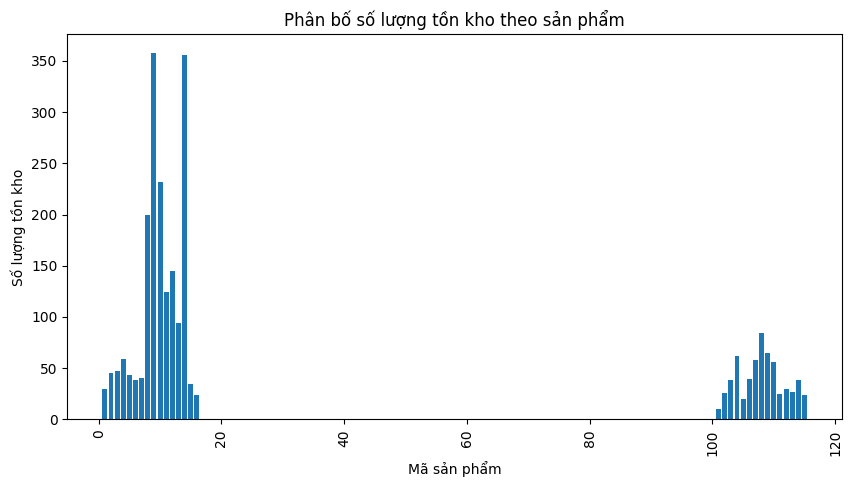

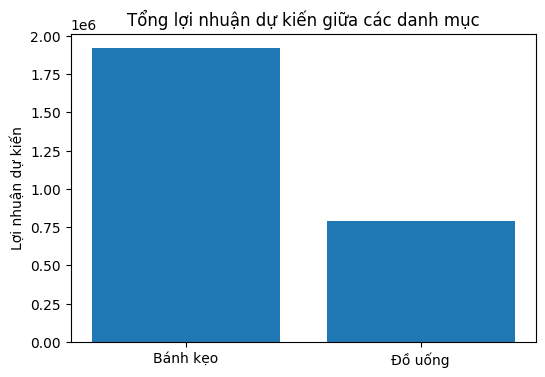

In [69]:
# Vẽ biểu đồ (SỬA LỖI: DÙNG 'Mã sản phẩm' THAY CHO 'Tên sản phẩm')
plt.figure(figsize=(10, 5))
plt.bar(df_tong_hop["Mã sản phẩm"], df_tong_hop["Số lượng tồn kho"])
plt.xticks(rotation=90)
plt.title("Phân bố số lượng tồn kho theo sản phẩm")
plt.xlabel("Mã sản phẩm")
plt.ylabel("Số lượng tồn kho")
plt.show()



plt.figure(figsize=(6, 4))
plt.bar(["Bánh kẹo", "Đồ uống"], [df_banh_keo["lợi nhuận dự kiến"].sum(), df_do_uong["lợi nhuận dự kiến"].sum()])
plt.title("Tổng lợi nhuận dự kiến giữa các danh mục")
plt.ylabel("Lợi nhuận dự kiến")
plt.show()

In [70]:
# Xuất file Excel
output_file = "Ket_qua.xlsx"
with pd.ExcelWriter(output_file) as writer:
    df_tong_hop.to_excel(writer, sheet_name="Tong Hop", index=False)
    san_pham_loi_nhuan_cao.to_excel(writer, sheet_name="Loi Nhuan Cao", index=False)
    san_pham_top_10_gia_ban.to_excel(writer, sheet_name="Top 10 Gia Ban", index=False)
    pd.DataFrame.from_dict(gia_nhap_cao_nhat, orient='index').to_excel(writer, sheet_name="Gia Nhap Cao Nhat")
    pd.DataFrame.from_dict(tong_ton_kho, orient='index', columns=["Tổng số lượng tồn kho"]).to_excel(writer, sheet_name="Tong Ton Kho")
    pd.DataFrame([{"Giá trị tồn kho trung bình": gia_tri_ton_kho_tb}]).to_excel(writer, sheet_name="Gia Tri Ton Kho TB", index=False)

print(f"Xuất file Excel hoàn tất: {output_file}")

Xuất file Excel hoàn tất: Ket_qua.xlsx
